In [1]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import keras

In [5]:
from keras.datasets import mnist

In [6]:
from keras.models import Sequential

In [7]:
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [8]:
#Get the data and pre-process it
#loading data
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [9]:
#reshaping data
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
#(X_train[1][7])
#plt.imshow(X_test[1])

In [11]:
def plot_input_img(i):
    plt.imshow(X_train[i] , cmap = 'binary') 
    plt.title(y_train[i])
    #plt.axis('off')
    plt.show()

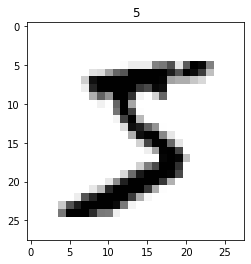

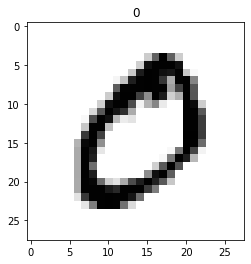

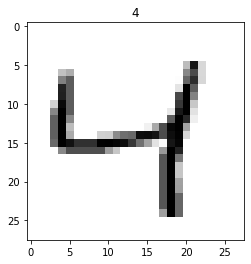

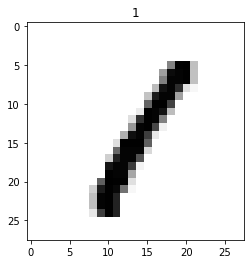

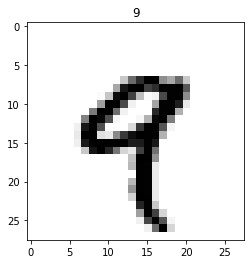

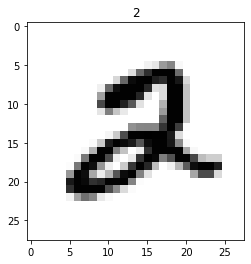

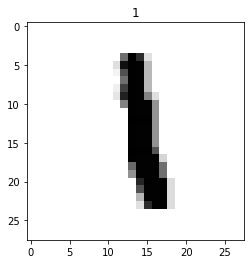

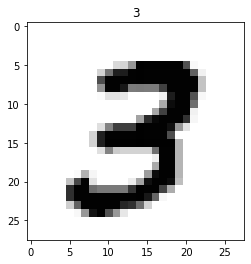

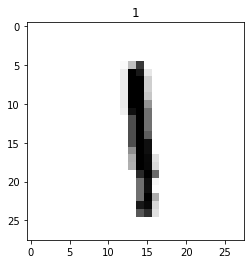

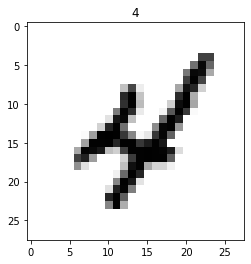

In [12]:
for i in range(10):
    plot_input_img(i)

In [13]:
#Pre-process image
# Normalizing image to [0,1] range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255

In [14]:
#Re-shape/expand dimension of the images to (28,28,1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [15]:
#Convert classes to one hot vectors
#for classification
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [16]:
#Building model/adding layers
#defining model
model = Sequential()

In [17]:
#adding convolution layer
model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation = 'relu'))
#adding pooling layer
model.add(MaxPool2D((2,2)))

In [18]:
model.add(Conv2D(64, (3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPool2D((2,2)))

In [19]:
#adding fully connected layer
model.add(Flatten())

In [20]:
#model.add(Dropout(0.25)) #prevents over-fitting of the model

In [21]:
#only for check
model.add(Dense(64, activation ="relu"))
#adding output layer
model.add(Dense(10, activation = "softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [23]:
#compile model
#optimizer = tf.keras.optimizers.Adam(0.0001)
model.compile(optimizer = 'rmsprop', loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])


In [24]:
#Callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [25]:
#Earlystopping
es = EarlyStopping(monitor = 'val_accuracy' , min_delta = 0.01 , patience = 4 , verbose = 1)

In [26]:
#Model check-point
mc = ModelCheckpoint("./bestmodel.h5" , monitor = "val_accuracy" , verbose = 1 , save_best_only = True)

In [27]:
#callbacks of the created model
cb = [es,mc]

In [28]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [29]:
%%time
#Model Training
#fitting the model
#his = model.fit(X_train, y_train, epochs = 2 , validation_split = 0.3 , callbacks = cb)
history = model.fit(x=X_train, y=y_train, epochs = 25 ,batch_size = 128, validation_data = (X_test,y_test), callbacks = cb)

Epoch 1/25
469/469 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 0.9354
Epoch 1: val_accuracy improved from -inf to 0.97570, saving model to .\bestmodel.h5
469/469 [==============================] - 48s 99ms/step - loss: 0.2119 - accuracy: 0.9354 - val_loss: 0.0780 - val_accuracy: 0.9757
Epoch 2/25
469/469 [==============================] - ETA: 0s - loss: 0.0580 - accuracy: 0.9818
Epoch 2: val_accuracy improved from 0.97570 to 0.98410, saving model to .\bestmodel.h5
469/469 [==============================] - 46s 99ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0471 - val_accuracy: 0.9841
Epoch 3/25
469/469 [==============================] - ETA: 0s - loss: 0.0395 - accuracy: 0.9878
Epoch 3: val_accuracy improved from 0.98410 to 0.98630, saving model to .\bestmodel.h5
469/469 [==============================] - 47s 100ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0362 - val_accuracy: 0.9863
Epoch 4/25
469/469 [==============================] - 

In [30]:
model_S = keras.models.load_model("C://Users//shwet//anaconda3//AI Project//bestmodel.h5")

In [31]:
#evaluting the model
score = model_S.evaluate(X_test, y_test)
print(f" the model accuracy is {score[1]} ")

313/313 [==============================] - 4s 11ms/step - loss: 0.0305 - accuracy: 0.9910
 the model accuracy is 0.9909999966621399 


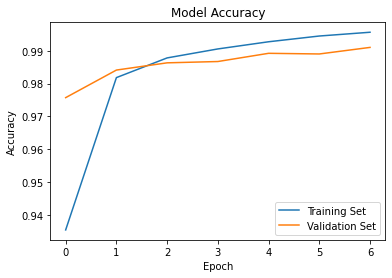

In [41]:
#plotting model-accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='lower right')
plt.show()

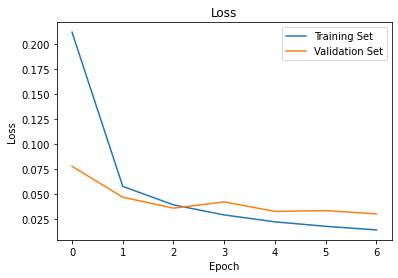

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Validation Set'], loc='upper right')
plt.show()

In [34]:
y_predicted = model_S.predict(X_test)
y_predicted[0]

313/313 [==============================] - 4s 11ms/step


array([1.58476461e-11, 4.07143368e-08, 3.80855347e-08, 1.36050872e-07,
       3.70807161e-12, 3.32791322e-10, 2.73572531e-16, 9.99999881e-01,
       2.89685026e-10, 1.46508015e-08], dtype=float32)

In [35]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
#y_predicted_labels[:5]

In [36]:
y_check = [np.argmax(i) for i in y_test]
#y_check[:5]

In [37]:
#type(y_predicted_labels), type(y_check)

In [38]:
y_predicted_labels = np.asarray(y_predicted_labels)
y_check = np.asarray(y_check)
#y_check.shape, y_predicted_labels.shape

In [39]:
cm= tf.math.confusion_matrix(labels=y_check, predictions=y_predicted_labels)


Text(69.0, 0.5, 'Truth')

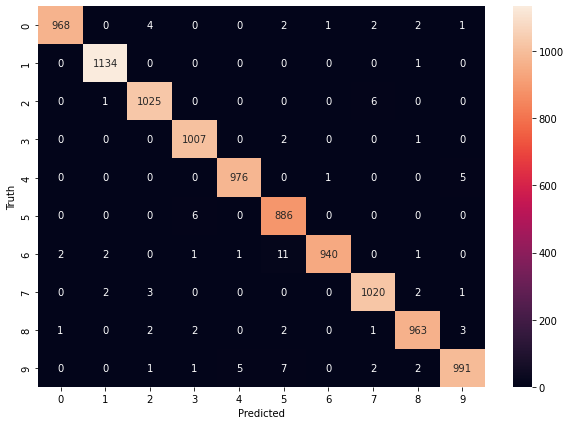

In [40]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')